In [1]:
#Phase 2

#Use KMeans algorithm (do not use column CLASS) 

import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

#continue working with cleaned breast cancer data from the phase 1

df = pd.read_csv("data/Breast-Cancer-Wisconsin.csv") 
df["A7"] = df["A7"].replace('?', np.NaN) #Replace ? by NaN in column A7
df["A7"] = pd.to_numeric(df['A7']) #Apply pandas function pd.to_numeric() for column A7
df = df.fillna(df["A7"].mean(skipna=True)) #Replace NaN values with the mean of column A7

In [2]:
new_df = df.loc[:, 'A2':'A10'] #use only columns A2-A10

In [3]:
from sklearn.cluster import KMeans #import KMeans - use sklearn.cluster

In [70]:
#assign columns
X = np.array(new_df)
a2 = X[:,0]
a3 = X[:,1]
a4 = X[:,2]
a5 = X[:,3]
a6 = X[:,4]
a7 = X[:,5]
a8 = X[:,6]
a9 = X[:,7]
a10 = X[:,8]

In [64]:
model = KMeans(n_clusters=4) #create KMeans model for n_cluster = 4

In [106]:
model.fit(X) # fit model to your data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [108]:
centroids = model.cluster_centers_ #calculate centroids
print(centroids) #print centroids - you should have a matrix with 4 row (4 clusters) and 9  columns (for each A column)

[[  1.79487179   1.12454212   1.21978022   1.14652015   1.97802198
    1.33496908   2.01098901   1.07692308   1.07326007]
 [  4.23076923   6.88461538   6.88461538   7.61538462   5.73076923
    9.26923077   6.76923077   8.38461538   1.96153846]
 [  6.35897436   3.92307692   4.48717949   3.02564103   4.02564103
    9.23076923   4.48717949   3.           1.33333333]
 [  8.46428571   5.10714286   5.82142857   3.5          4.25         9.10714286
    6.5          8.35714286   2.        ]
 [  8.125        8.70833333   8.29166667   4.33333333   6.70833333   9.375
    6.33333333   1.83333333   1.66666667]
 [  7.36363636   9.63636364   9.81818182   9.09090909   6.59090909
    9.81818182   7.86363636   8.54545455   2.95454545]
 [  6.96         4.52         4.24         9.32         4.52         9.68
    5.64         3.72         2.48      ]
 [  7.42857143   7.19047619   6.52380952   2.47619048   5.47619048
    3.09949104   4.23809524   8.52380952   1.80952381]
 [  8.63157895   3.68421053   4.421

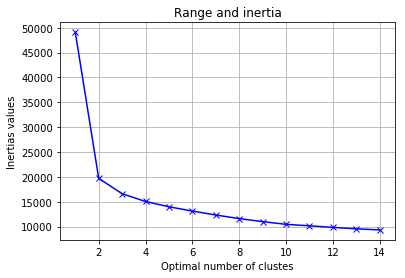

In [123]:
#Find the optimal number of clusters

ks = range(1,15) #create a range from 1 to 15 or more

inertias_values = [] #create an empty list for inertias values
K = range(1,15) #create a range from 1 to 15 or more
for k in K: #use for loop to calculate KMeans for each values
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias_values.append(kmeanModel.inertia_)
    
plt.plot(K, inertias_values, 'bx-') #plot range and inertia
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Inertias Values') #add title, ylabel, xlabel
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
print ("The optimal number of clustes based on the inertia plot is 3")

In [ ]:
#Revise data variation

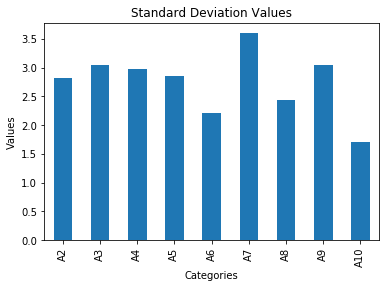

In [125]:
new_df_std = new_df.std ()#apply standard deviation function for columns A2-A10

new_df_std.plot.bar() # plot standard deviation values
plt.title('Standard Deviation Values')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

In [126]:
print('A7 column has a lof of variation')#describe which features have a lot of data variation

A7 column has a lof of variation


In [ ]:
#Implement normalization

In [89]:
from sklearn.pipeline import make_pipeline #import make_pipeline - use sklearn.pipeline
from sklearn.preprocessing import StandardScaler #import StandardScaler
from sklearn.cluster import KMeans

In [95]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2)
pipeline = make_pipeline(scaler, kmeans) #create a pipeline

In [96]:
# Fit the pipeline to samples
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

In [131]:
model2 = kmeans.fit(X) 

In [132]:
print(model2.cluster_centers_) #find centroids and print them

[[ 3.0472103   1.30257511  1.44635193  1.34334764  2.08798283  1.38000113
   2.10515021  1.26180258  1.10944206]
 [ 7.15879828  6.79828326  6.72961373  5.73390558  5.472103    7.87396553
   6.10300429  6.07725322  2.54935622]]
